# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 3

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

#minGames = df['games played'] >= 0

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [6]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('DEFENDERS')
display(df[defenders ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
12,Martínez,Aston Villa,45,2.000000,19,14.594632,9.5,7.297316,6.257553,3.439988
252,Alisson,Liverpool,60,2.982456,17,17.691293,5.7,5.931786,5.855826,2.421642
325,Darlow,Newcastle Utd,50,2.982456,17,15.107934,5.7,5.065601,5.289351,2.265406
128,Guaita,Crystal Palace,50,3.000000,15,14.381231,5.0,4.793744,4.525009,2.143827
157,Pickford,Everton,50,2.972973,11,13.747622,3.7,4.624200,4.311065,2.068005
213,Meslier,Leeds United,45,3.023256,13,10.596017,4.3,3.504836,3.534685,1.652196
483,Ramsdale,Sheffield Utd,50,3.043478,7,10.846503,2.3,3.563851,3.341571,1.593803
8,Leno,Arsenal,50,3.000000,12,10.192202,4.0,3.397401,3.833959,1.519364
383,Lloris,Tottenham,55,3.043478,7,10.317778,2.3,3.390127,3.556034,1.445555


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
442,Masuaku,West Ham,45,2.000000,13,13.187778,6.5,6.593889,5.556296,3.108389
41,Mings,Aston Villa,50,2.000000,22,12.691183,11.0,6.345592,4.976460,2.837835
155,Digne,Everton,61,3.015873,19,20.738094,6.3,6.876315,6.374495,2.784139
46,Konsa,Aston Villa,45,2.000000,21,11.194632,10.5,5.597316,4.484360,2.638600
498,Castagne,Leicester City,57,3.000000,27,17.984108,9.0,5.994703,5.794803,2.510905
352,Jack Robinson,Sheffield Utd,44,1.000000,2,4.965280,2.0,4.965280,5.069467,2.367104
156,Keane,Everton,50,3.000000,15,15.708964,5.0,5.236321,4.570916,2.341754
152,Coleman,Everton,50,3.023256,13,15.458298,4.3,5.113129,4.692437,2.286661
255,Robertson,Liverpool,70,2.985075,20,17.591963,6.7,5.893308,5.155379,2.227461


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
33,Hourihane,Aston Villa,60,2.000000,17,13.695210,8.5,6.847605,6.050915,2.795523
105,Jorginho,Chelsea,51,2.000000,12,12.614303,6.0,6.307151,6.556661,2.792854
251,Mané,Liverpool,119,3.012048,25,26.684460,8.3,8.859241,6.434772,2.568166
272,De Bruyne,Manchester City,116,2.000000,15,17.147150,7.5,8.573575,10.948030,2.517288
254,Salah,Liverpool,121,3.010753,28,25.620502,9.3,8.509667,6.442953,2.446357
137,Townsend,Crystal Palace,60,3.013699,22,17.342271,7.3,5.754481,5.894179,2.349257
275,Mahrez,Manchester City,84,1.000000,12,6.661851,12.0,6.661851,7.276665,2.298557
38,McGinn,Aston Villa,55,2.000000,12,10.691761,6.0,5.345881,4.719975,2.279491
235,Barnes,Leicester City,70,3.000000,18,17.195165,6.0,5.731722,5.583715,2.166387


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,105,3.010753,28,30.382759,9.3,10.091416,11.847464,3.114279
164,Calvert-Lewin,Everton,74,3.009709,31,24.500000,10.3,8.140323,6.924856,2.992442
166,Richarlison,Everton,80,3.013699,22,24.909655,7.3,8.265476,7.211668,2.922287
68,Maupay,Brighton,65,2.988506,26,21.836552,8.7,7.306846,5.403033,2.865981
202,Bamford,Leeds United,58,2.989691,29,18.693103,9.7,6.252521,7.003240,2.596218
224,Vardy,Leicester City,100,2.990654,32,23.180000,10.7,7.750813,7.545313,2.451022
506,Wilson,Newcastle Utd,64,3.000000,18,17.420000,6.0,5.806667,5.336794,2.295287
6,Lacazette,Arsenal,85,3.000000,21,16.800000,7.0,5.600000,5.597479,1.920784
184,Mitrović,Fulham,60,3.000000,15,13.720000,5.0,4.573333,4.636697,1.867056


Below we compile a list sorting players based on a given metric (irrespective of position).

In [7]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,105,3.010753,28,30.382759,9.3,10.091416,11.847464,3.114279
251,Mané,Liverpool,119,3.012048,25,26.684460,8.3,8.859241,6.434772,2.568166
272,De Bruyne,Manchester City,116,2.000000,15,17.147150,7.5,8.573575,10.948030,2.517288
254,Salah,Liverpool,121,3.010753,28,25.620502,9.3,8.509667,6.442953,2.446357
166,Richarlison,Everton,80,3.013699,22,24.909655,7.3,8.265476,7.211668,2.922287
164,Calvert-Lewin,Everton,74,3.009709,31,24.500000,10.3,8.140323,6.924856,2.992442
224,Vardy,Leicester City,100,2.990654,32,23.180000,10.7,7.750813,7.545313,2.451022
68,Maupay,Brighton,65,2.988506,26,21.836552,8.7,7.306846,5.403033,2.865981
12,Martínez,Aston Villa,45,2.000000,19,14.594632,9.5,7.297316,6.257553,3.439988


In [8]:
metric = 'valuePoints metric'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
12,Martínez,Aston Villa,45,2.000000,19,14.594632,9.5,7.297316,6.257553,3.439988
388,Kane,Tottenham,105,3.010753,28,30.382759,9.3,10.091416,11.847464,3.114279
442,Masuaku,West Ham,45,2.000000,13,13.187778,6.5,6.593889,5.556296,3.108389
164,Calvert-Lewin,Everton,74,3.009709,31,24.500000,10.3,8.140323,6.924856,2.992442
166,Richarlison,Everton,80,3.013699,22,24.909655,7.3,8.265476,7.211668,2.922287
68,Maupay,Brighton,65,2.988506,26,21.836552,8.7,7.306846,5.403033,2.865981
41,Mings,Aston Villa,50,2.000000,22,12.691183,11.0,6.345592,4.976460,2.837835
33,Hourihane,Aston Villa,60,2.000000,17,13.695210,8.5,6.847605,6.050915,2.795523
105,Jorginho,Chelsea,51,2.000000,12,12.614303,6.0,6.307151,6.556661,2.792854


In [9]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,105,3.010753,28,30.382759,9.3,10.091416,11.847464,3.114279
272,De Bruyne,Manchester City,116,2.000000,15,17.147150,7.5,8.573575,10.948030,2.517288
224,Vardy,Leicester City,100,2.990654,32,23.180000,10.7,7.750813,7.545313,2.451022
275,Mahrez,Manchester City,84,1.000000,12,6.661851,12.0,6.661851,7.276665,2.298557
166,Richarlison,Everton,80,3.013699,22,24.909655,7.3,8.265476,7.211668,2.922287
390,Son,Tottenham,90,3.000000,27,17.717595,9.0,5.905865,7.158952,1.968622
366,Ings,Southampton,84,3.013699,22,15.420000,7.3,5.116636,7.154402,1.765407
202,Bamford,Leeds United,58,2.989691,29,18.693103,9.7,6.252521,7.003240,2.596218
164,Calvert-Lewin,Everton,74,3.009709,31,24.500000,10.3,8.140323,6.924856,2.992442


## Player Visualizations

In [10]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))

display(game_weeks)
display(column_xPoints)

array([1, 2, 3])

['xPoints week 1', 'xPoints week 2', 'xPoints week 3']

In [11]:
# find player index
df[df['web_name'].str.contains('Masua')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,squad_number,status,team,team_code,threat,threat_rank,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards,team_name,games played,adjusted points,xG,xG_points,xG_week3,goals_week3,xPoints week 3,clean_sheet_points,xGA_week3,cleansheet_week3,xA,xA_points,xA_week3,assists_week3,adjusted points per game,xPoints week 1,xPoints week 2,next1_xP,next5_xP,next10_xP,value,valuePoints metric
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
442,1,3,63,NaN,NaN,1,105717,NaN,NaN,0,0,0,0,72.6,24,6,NaN,NaN,1,2,3.8,4.3,12,Arthur,4.3,2,0,13.2,66,12,False,54.0,84,30,179,NaN,NaN,45,0,0,NaN,0,NaN,105717.jpg,6.5,0,0,Masuaku,0.4,False,NaN,a,19,21,5.0,205,58,13,13121,10964,6789,1682,1.0,2.9,Masuaku,0,West Ham,2.0,13.187778,0.0,0.0,0.0,0.0,8.786341,2.491226,0.7,1.0,1.1,3.3,0.6,1.0,6.593889,NaN,3.307586,5.556296,6.139555,6.542474,1.465309,3.108389


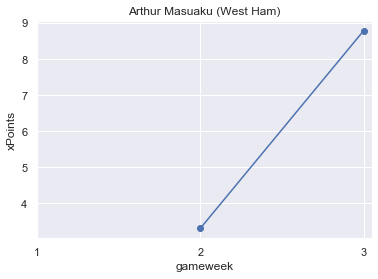

In [12]:
# plot xPoints over time
ix = 442
plt.plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
plt.title(title_string)
plt.xlabel('gameweek')
plt.ylabel('xPoints')
plt.xticks(game_weeks)
plt.show()

## My team

In [13]:
# find player index
df[df['web_name'].str.contains('Brew')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,squad_number,status,team,team_code,threat,threat_rank,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards,team_name,games played,adjusted points,xG,xG_points,xG_week3,goals_week3,xPoints week 3,clean_sheet_points,xGA_week3,cleansheet_week3,xA,xA_points,xA_week3,assists_week3,adjusted points per game,xPoints week 1,xPoints week 2,next1_xP,next5_xP,next10_xP,value,valuePoints metric
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
262,0,0,0,NaN,NaN,0,195473,NaN,NaN,0,0,0,0,0.0,413,47,NaN,NaN,0,4,1.5,0.5,0,Rhian,0.0,0,0,0.0,428,47,False,0.0,422,42,0,NaN,NaN,45,0,0,NaN,0,NaN,195473.jpg,0.0,0,0,Brewster,4.9,False,NaN,a,11,14,0.0,378,46,0,154304,8022,199471,33533,0.0,0.0,Brewster,0,Liverpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
my_starting11 = [363,259,313,239,254,272,306,508,469,506,460]
my_subs = [35,77,146,262]

In [15]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
363,McCarthy,Southampton,45,2.962963,8,7.452680,2.7,2.515280,3.800519,1.185714
259,Alexander-Arnold,Liverpool,75,3.000000,15,17.115440,5.0,5.705147,5.190070,2.083225
313,Wan-Bissaka,Manchester Utd,55,1.000000,1,1.569096,1.0,1.569096,1.284543,0.669065
239,Justin,Leicester City,47,2.982456,17,11.767645,5.7,3.945622,3.734470,1.819980
254,Salah,Liverpool,121,3.010753,28,25.620502,9.3,8.509667,6.442953,2.446357
272,De Bruyne,Manchester City,116,2.000000,15,17.147150,7.5,8.573575,10.948030,2.517288
306,Rashford,Manchester Utd,95,2.000000,9,5.584548,4.5,2.792274,2.755607,0.905933
508,Rodríguez,Everton,77,2.982456,17,16.688838,5.7,5.595669,5.008585,2.016539
469,Podence,Wolves,56,2.000000,11,10.154490,5.5,5.077245,5.789612,2.145528



SUBSTITUTES


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
35,Nyland,Aston Villa,40,NaN,0,NaN,0.0,NaN,NaN,NaN
77,Lamptey,Brighton,46,2.972973,11,13.124538,3.7,4.414617,3.147778,2.058326
146,Mitchell,Crystal Palace,41,3.000000,12,9.777783,4.0,3.259261,2.990526,1.609634
262,Brewster,Liverpool,45,NaN,0,NaN,0.0,NaN,NaN,NaN


## Save data

In [16]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)